**Script for Post Processing simple sound wave**

athinput parameters:


<hydro>

gamma = 1.666666666666667 # gamma = C_p/C_v

iso_sound_speed = 2.0     # isothermal sound speed

<problem>

compute_error = true  # when 'true' outputs L1 error compared to initial data

wave_flag = 0         # Wave family number (0 - 4 for adiabatic hydro)

amp       = 1.0e-4    # Wave Amplitude

vflow     = 0.0       # background flow velocity

ang_2     = 0.0       # rotation of k around x3 axis

ang_3     = 0.0       # rotation of k around x2 axis

{'rho': array([[[1.00000072, 1.00000322, 1.00000572, 1.00000823, 1.00001085,
         1.00001335, 1.00001585, 1.00001836, 1.00002086, 1.00002325,
         1.00002575, 1.00002825, 1.00003064, 1.00003302, 1.00003541,
         1.00003779, 1.00004005, 1.00004244, 1.0000447 , 1.00004697,
         1.00004911, 1.00005138, 1.00005352, 1.00005567, 1.0000577 ,
         1.00005972, 1.00006175, 1.00006366, 1.00006568, 1.00006747,
         1.00006938, 1.00007117, 1.00007284, 1.00007463, 1.00007629,
         1.00007784, 1.00007939, 1.00008094, 1.00008237, 1.0000838 ,
         1.00008512, 1.00008643, 1.00008762, 1.00008881, 1.00008988,
         1.00009096, 1.00009203, 1.00009298, 1.00009382, 1.00009465,
         1.00009549, 1.0000962 , 1.0000968 , 1.00009739, 1.00009799,
         1.00009847, 1.00009882, 1.00009918, 1.00009954, 1.00009966,
         1.0000999 , 1.00010002, 1.00010002, 1.00010002, 1.00010002,
         1.0000999 , 1.00009966, 1.00009942, 1.00009906, 1.00009871,
         1.00009835, 1.000

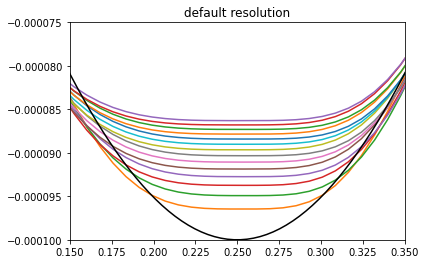

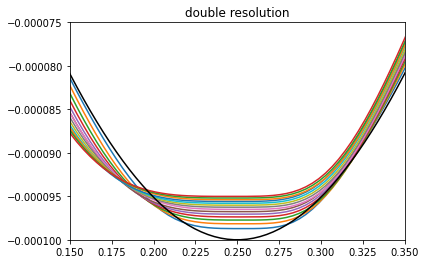

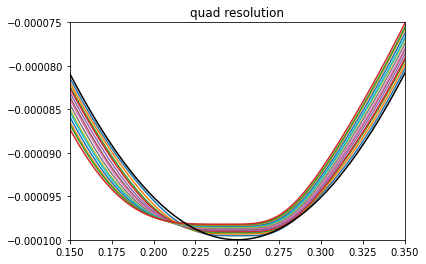

In [1]:

import numpy as np
from matplotlib import pyplot as plt
import athena_read

#analytical solution
gamma = (5/3)
k =-np.pi*2
cs = 1
w = np.sqrt((k*k)/(cs*cs))
#time step from athinput
dt = .01
#time is the vtk file number times dt
t = dt*4000

#expect amp from input file is DENSITY perturbation
p0 = 1
cs = 1
press_0 = p0*cs*cs/gamma

amp = .0001
rho_pert = -amp
#derived density and velocity perturbation relation
v_pert = -(amp*k)/(w*p0)
press_pert = gamma*rho_pert*(press_0/p0)

def func_vel(x):
    return v_pert*np.sin(k*x-w*t)
def func_rho(x):
    return rho_pert*np.sin(k*x-w*t)+p0
def func_press(x):
    return press_pert*np.sin(k*x-w*t)+press_0

y_vel = []
y_rho = []
y_press = []
x_avg = []

#get x from any of the athena outputs
x,y,z,data = athena_read.vtk('./double_res_xord3/LinWave.block0.out2.04000.vtk')
for i in range(len(x)-1):
    x_avg.append((x[i]+x[i+1])/2)


for x in x_avg:
    y_vel.append(func_vel(x))
    y_rho.append(func_rho(x))
    y_press.append(func_press(x))


#plt.plot(x_avg,y_vel,label = 'analytical_solution',color = 'black')
#plt.plot(x_avg,y_rho,label = 'analytical_solution',color = 'black')


#Athena calculated solutions

def rho_plot(file_name,plot_name):
  
    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)

    print(data)
    rho = data['rho'][0][0]
    
    plt.plot(x_avg,rho,label = plot_name)
    #return minima to show time evolution
    return min(rho)
    
rho_plot('./double_res_xord3/LinWave.block0.out2.04000.vtk','double, xorder =3')
#rho_plot('./double_res_xord3/LinWave.block0.out2.04005.vtk','double, xorder = 3')
#rho_plot('./double_res_xord3/LinWave.block0.out2.04010.vtk','double, xorder = 3')
    
def vel_plot(file_name,plot_name):

    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)


    vel = data['vel'][0][0][:,0]
    plt.plot(x_avg,vel,label = plot_name)
    return min(vel)
   
def press_plot(file_name,plot_name):

    x,y,z,data = athena_read.vtk(file_name)

    #redefine x values to be average of adjacent outputs
    x_avg = []

    for i in range(len(x)-1):
        x_avg.append((x[i]+x[i+1])/2)


    press = data['press'][0][0]
    plt.plot(x_avg,press,label = plot_name)

#vel_plot('./double_res_xord3/LinWave.block0.out2.04001.vtk','double, xorder =3')
#vel_plot('./double_res/LinWave.block0.out2.04001.vtk','double, xorder = 2')
num = 4000


#Time evolution plot:
counter = np.arange(1,14999)
for num in counter:
    n = str(num)
    while len(n)<5:
        n = '0'+n
    if num%1000 ==0:
        vel_plot('./default_long/LinWave.block0.out2.'+str(n)+'.vtk','time_step '+n)
        pass
plt.xlim([.15,.35])
plt.ylim([-1e-4,-7.5e-5])
plt.title('default resolution')
plt.plot(x_avg,y_vel,label = 'analytical_solution',color = 'black')
plt.show()

#Time evolution plot, double res:
counter = np.arange(1,14999)
for num in counter:
    n = str(num)
    while len(n)<5:
        n = '0'+n
    if num%1000 ==0:
        vel_plot('./double_res_long/LinWave.block0.out2.'+str(n)+'.vtk','time_step '+n)
        pass
plt.xlim([.15,.35])
plt.ylim([-1e-4,-7.5e-5])
plt.title('double resolution')
plt.plot(x_avg,y_vel,label = 'analytical_solution',color = 'black')
plt.show()

#Time evolution plot, double res:
counter = np.arange(1,14999)
for num in counter:
    n = str(num)
    while len(n)<5:
        n = '0'+n
    if num%1000 ==0:
        vel_plot('./quad_res_long/LinWave.block0.out2.'+str(n)+'.vtk','time_step '+n)
        pass
plt.xlim([.15,.35])
plt.ylim([-1e-4,-7.5e-5])
plt.title('quad resolution')
plt.plot(x_avg,y_vel,label = 'analytical_solution',color = 'black')
plt.show()
#vel_plot('./quad_res/LinWave.block0.out2.04000.vtk','quad')

#vel_plot('./double_res_xord3/LinWave.block0.out2.04000.vtk','double, xorder =3')
#vel_plot('./double_res_xord3/LinWave.block0.out2.04005.vtk','double, xorder = 3')
#vel_plot('./double_res_xord3/LinWave.block0.out2.04010.vtk','double, xorder = 3')
    




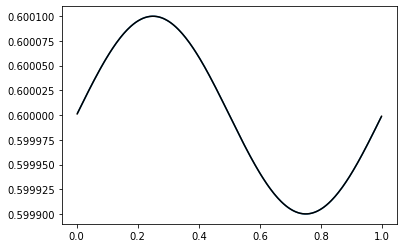

NameError: name 'y_minima' is not defined

In [14]:
press_plot('./default_long/LinWave.block0.out2.00000.vtk','time_step 0' )
plt.plot(x_avg,y_press,label = 'analytical_solution',color = 'black')
plt.show()

counter = [0,25]
for num in counter:
    n = str(num)
    while len(n)<5:
        n = '0'+n
    if num%1 ==0:
        y_minima.append(press_plot('./default_long/LinWave.block0.out2.'+str(n)+'.vtk','time_step '+n))
        x_minima.append(num)

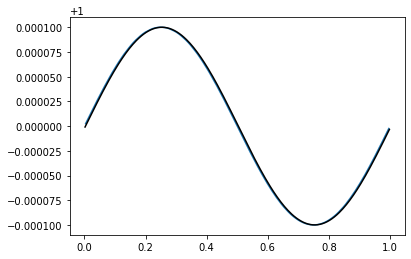

In [43]:
rho_plot('./default_long/LinWave.block0.out2.00000.vtk','time_step 0' )
plt.plot(x_avg,y_rho,label = 'analytical_solution',color = 'black')
plt.show()

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000]
[0.9999035000801086, 0.9999050498008728, 0.9999062418937683, 0.9999072551727295, 0.9999080896377563, 0.9999089241027832, 0.9999096393585205, 0.999910295009613, 0.9999108910560608, 0.9999114871025085, 0.9999120831489563, 0.9999125599861145, 0.9999130964279175, 0.9999135732650757]


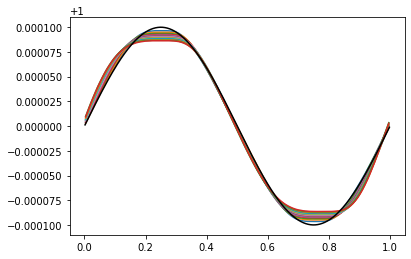

In [15]:
counter = np.arange(1,15000)
y_minima = []
x_minima= []
for num in counter:
    n = str(num)
    while len(n)<5:
        n = '0'+n
    if num%1000 ==0:
        y_minima.append(rho_plot('./default_long/LinWave.block0.out2.'+str(n)+'.vtk','time_step '+n))
        x_minima.append(num)
        pass
print(x_minima)
print(y_minima)

#plt.xlim([.5,.35])
#plt.ylim([1-1e-4,1-8e-5])
#plt.plot(x_minima, y_minima)
#plt.plot(x_avg,y_vel,label = 'analytical_solution',color = 'black')
plt.plot(x_avg,y_rho,label = 'analytical_solution',color = 'black')
plt.show()